In [16]:
import numpy as np  # Importa a biblioteca NumPy, usada para operações com arrays
import imutils      # Importa a biblioteca imutils, que contém várias funções auxiliares para processamento de imagens
import cv2          # Importa a biblioteca OpenCV, usada para processamento de imagens
from matplotlib import pyplot as plt  # Importa a biblioteca Matplotlib para plotagem de gráficos


# Capítulo 4 - Transformações e Máscaras

Recorte:

In [9]:
import cv2

# Carrega a imagem
imagem = cv2.imread('ponte.jpg')

# Verifica as dimensões da imagem
altura, largura, canais = imagem.shape

# Define o tamanho do recorte (por exemplo, 100x100 pixels)
tamanho_recorte = 100

# Certifica-se de que o recorte está dentro dos limites da imagem
x_inicio = min(128, largura - tamanho_recorte)
y_inicio = min(128, altura - tamanho_recorte)

# Realiza o recorte da imagem
recorte = imagem[y_inicio:y_inicio+tamanho_recorte, x_inicio:x_inicio+tamanho_recorte]

# Exibe o recorte da imagem usando cv2.imshow
cv2.imshow("Recorte", recorte)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salva o recorte no disco
cv2.imwrite("recorte.jpg", recorte)


True

Redimensionamentos

In [10]:
import cv2  # Importa a biblioteca OpenCV, utilizada para processamento de imagens

# Carrega a imagem a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg')

# Exibe a imagem carregada em uma janela chamada "imagem"
cv2.imshow("imagem", img)

# Obtém a largura da imagem original (índice 1 da tupla retornada por img.shape)
largura = img.shape[1]

# Obtém a altura da imagem original (índice 0 da tupla retornada por img.shape)
altura = img.shape[0]

# Calcula a proporção (aspect ratio) da imagem original
proporcao = float(altura / largura)

# Define a nova largura desejada para a imagem redimensionada (em pixels)
largura_nova = 320

# Calcula a nova altura para a imagem redimensionada, mantendo a proporção original
altura_nova = int(largura_nova * proporcao)

# Cria uma tupla com o novo tamanho (largura e altura) da imagem
tamanho_novo = (largura_nova, altura_nova)

# Redimensiona a imagem original para o novo tamanho especificado, usando a interpolação INTER_AREA
img_redimensionada = cv2.resize(img, tamanho_novo, interpolation=cv2.INTER_AREA)

# Exibe a imagem redimensionada em uma janela chamada "imagem redimensionada"
cv2.imshow("imagem redimensionada", img_redimensionada)

# Aguarda uma tecla ser pressionada para fechar as janelas exibidas
cv2.waitKey(0)


-1

In [11]:
# Carrega a imagem a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg')

# Exibe a imagem original em uma janela chamada "Original"
cv2.imshow("Original", img)

# Redimensiona a imagem utilizando slicing (pegando um em cada dois pixels em ambas as direções)
# Isso efetivamente reduz a resolução da imagem pela metade em cada dimensão
img_redimensionada = img[::2, ::2]

# Exibe a imagem redimensionada em uma janela chamada "Imagem redimensionada"
cv2.imshow("Imagem redimensionada", img_redimensionada)

# Aguarda uma tecla ser pressionada para fechar as janelas exibidas
cv2.waitKey(0)

-1

Espelhamento / Flip

In [12]:
# Carrega a imagem a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg')

# Exibe a imagem original em uma janela chamada "Original"
cv2.imshow("Original", img)

# Realiza o flip horizontal da imagem usando slicing
flip_horizontal = img[::-1, :]  
# Comando equivalente utilizando OpenCV:
# flip_horizontal = cv2.flip(img, 1)

# Exibe a imagem flipada horizontalmente em uma janela chamada "Flip Horizontal"
cv2.imshow("Flip Horizontal", flip_horizontal)

# Realiza o flip vertical da imagem usando slicing
flip_vertical = img[:, ::-1]
# Comando equivalente utilizando OpenCV:
# flip_vertical = cv2.flip(img, 0)

# Exibe a imagem flipada verticalmente em uma janela chamada "Flip Vertical"
cv2.imshow("Flip Vertical", flip_vertical)

# Realiza o flip horizontal e vertical da imagem usando slicing
flip_hv = img[::-1, ::-1]
# Comando equivalente utilizando OpenCV:
# flip_hv = cv2.flip(img, -1)

# Exibe a imagem flipada horizontalmente e verticalmente em uma janela chamada "Flip Horizontal e Vertical"
cv2.imshow("Flip Horizontal e Vertical", flip_hv)

# Aguarda uma tecla ser pressionada para fechar as janelas exibidas
cv2.waitKey(0)


-1

Rotacionamento

In [13]:
# Carrega a imagem a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg')

# Captura as dimensões da imagem: altura (alt) e largura (lar)
(alt, lar) = img.shape[:2]

# Calcula o ponto central da imagem
centro = (lar // 2, alt // 2)

# Obtém a matriz de rotação para um ângulo de 30 graus, mantendo a escala 1.0
M = cv2.getRotationMatrix2D(centro, 30, 1.0)

# Aplica a transformação de rotação na imagem usando a matriz de rotação obtida
img_rotacionada = cv2.warpAffine(img, M, (lar, alt))

# Exibe a imagem rotacionada em uma janela chamada "Imagem rotacionada em 30 graus"
cv2.imshow("Imagem rotacionada em 30 graus", img_rotacionada)

# Aguarda uma tecla ser pressionada para fechar as janelas exibidas
cv2.waitKey(0)

-1

Máscaras

In [14]:
# Carrega a imagem a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg')

# Exibe a imagem original em uma janela chamada "Original"
cv2.imshow("Original", img)

# Cria uma máscara com o mesmo tamanho da imagem original, inicializada com zeros (preta)
mascara = np.zeros(img.shape[:2], dtype="uint8")

# Calcula o ponto central da imagem
(cX, cY) = (img.shape[1] // 2, img.shape[0] // 2)

# Desenha um círculo branco (valor 255) na máscara com raio de 100 pixels, centrado no ponto central da imagem
cv2.circle(mascara, (cX, cY), 100, 255, -1)

# Aplica a máscara à imagem usando uma operação bitwise AND
img_com_mascara = cv2.bitwise_and(img, img, mask=mascara)

# Exibe a imagem resultante com a máscara aplicada em uma janela chamada "Máscara aplicada à imagem"
cv2.imshow("Máscara aplicada à imagem", img_com_mascara)

# Aguarda uma tecla ser pressionada para fechar as janelas exibidas
cv2.waitKey(0)

-1

In [15]:
# Carrega a imagem a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg')

# Exibe a imagem original em uma janela chamada "Original"
cv2.imshow("Original", img)

# Cria uma máscara com o mesmo tamanho da imagem original, inicializada com zeros (preta)
mascara = np.zeros(img.shape[:2], dtype="uint8")

# Calcula o ponto central da imagem
(cX, cY) = (img.shape[1] // 2, img.shape[0] // 2)

# Desenha um círculo na máscara
# Primeiro círculo: Desenha uma borda de círculo com raio de 180 pixels e espessura de 70 pixels
cv2.circle(mascara, (cX, cY), 180, 255, 70)

# Segundo círculo: Desenha um círculo preenchido com raio de 70 pixels
cv2.circle(mascara, (cX, cY), 70, 255, -1)

# Exibe a máscara em uma janela chamada "Máscara"
cv2.imshow("Máscara", mascara)

# Aplica a máscara à imagem usando uma operação bitwise AND
img_com_mascara = cv2.bitwise_and(img, img, mask=mascara)

# Exibe a imagem resultante com a máscara aplicada em uma janela chamada "Máscara aplicada à imagem"
cv2.imshow("Máscara aplicada à imagem", img_com_mascara)

# Aguarda uma tecla ser pressionada para fechar as janelas exibidas
cv2.waitKey(0)

-1

# Capítulo 6 - Histograma e Equalização

Escala de Cinza

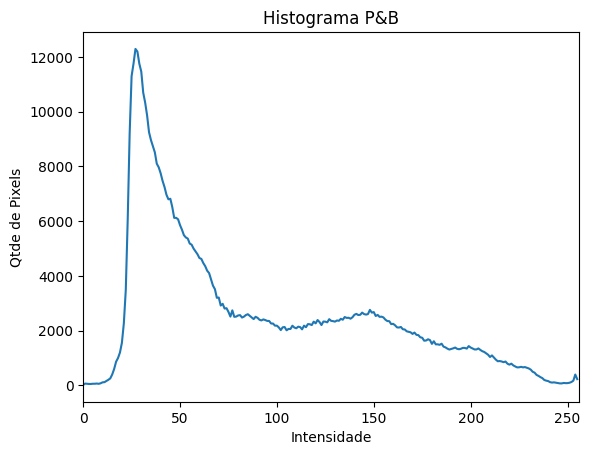

-1

In [17]:
# Carrega a imagem a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg')

# Converte a imagem para escala de cinza (preto e branco)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Exibe a imagem em escala de cinza em uma janela chamada "Imagem P&B"
cv2.imshow("Imagem P&B", img)

# Calcula o histograma da imagem em escala de cinza
# [img]: imagem de entrada
# [0]: canal a ser considerado (0 para imagens em escala de cinza)
# None: nenhuma máscara (considera a imagem inteira)
# [256]: número de bins (intervalos) do histograma
# [0, 256]: intervalo de valores de pixel (0 a 255)
h = cv2.calcHist([img], [0], None, [256], [0, 256])

# Cria uma nova figura para o gráfico do histograma
plt.figure()

# Define o título do gráfico
plt.title("Histograma P&B")

# Define o rótulo do eixo x
plt.xlabel("Intensidade")

# Define o rótulo do eixo y
plt.ylabel("Qtde de Pixels")

# Plota o histograma
plt.plot(h)

# Define os limites do eixo x (intensidade de pixel de 0 a 255)
plt.xlim([0, 256])

# Exibe o gráfico
plt.show()

# Aguarda uma tecla ser pressionada para fechar as janelas exibidas
cv2.waitKey(0)

Canais RGB

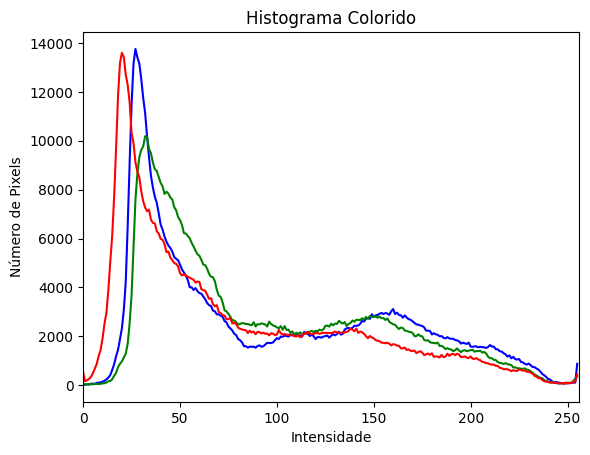

-1

In [18]:
# Carrega a imagem a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg')

# Exibe a imagem colorida em uma janela chamada "Imagem Colorida"
cv2.imshow("Imagem Colorida", img)

# Separa os canais de cor (B, G, R) da imagem
canais = cv2.split(img)

# Define as cores para os canais B, G e R para o gráfico
cores = ("b", "g", "r")

# Cria uma nova figura para o gráfico do histograma
plt.figure()

# Define o título do gráfico
plt.title("Histograma Colorido")

# Define o rótulo do eixo x
plt.xlabel("Intensidade")

# Define o rótulo do eixo y
plt.ylabel("Número de Pixels")

# Loop para calcular e plotar o histograma de cada canal de cor
for (canal, cor) in zip(canais, cores):
    # Calcula o histograma para o canal atual
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
    
    # Plota o histograma do canal atual
    plt.plot(hist, color=cor)
    
    # Define os limites do eixo x (intensidade de pixel de 0 a 255)
    plt.xlim([0, 256])

# Exibe o gráfico
plt.show()

# Aguarda uma tecla ser pressionada para fechar as janelas exibidas
cv2.waitKey(0)

Equalização de Histograma

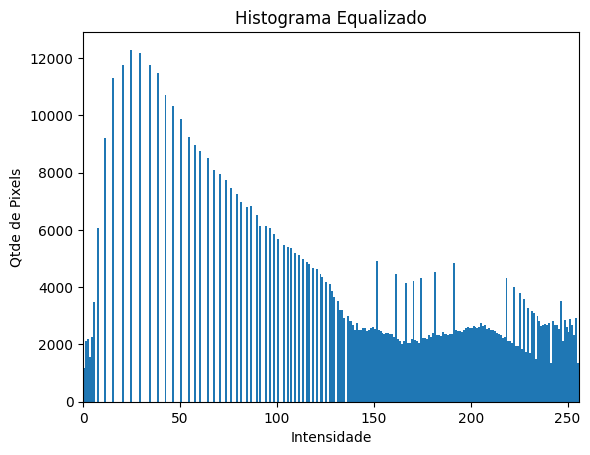

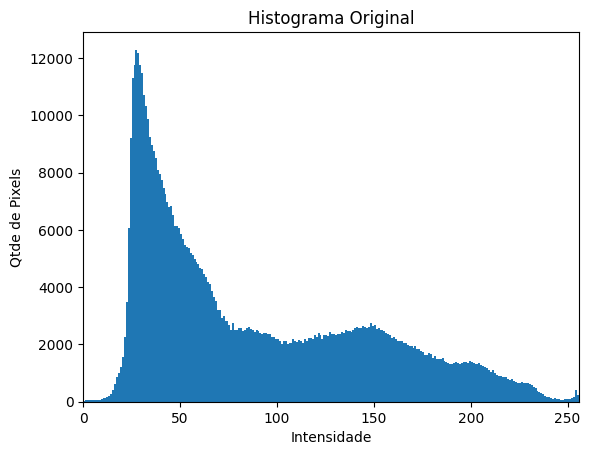

-1

In [19]:
# Carrega a imagem a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg')

# Converte a imagem para escala de cinza (preto e branco)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Equaliza o histograma da imagem em escala de cinza
h_eq = cv2.equalizeHist(img)

# Cria uma nova figura para o histograma equalizado
plt.figure()
plt.title("Histograma Equalizado")  # Define o título do gráfico
plt.xlabel("Intensidade")  # Define o rótulo do eixo x
plt.ylabel("Qtde de Pixels")  # Define o rótulo do eixo y
plt.hist(h_eq.ravel(), 256, [0, 256])  # Plota o histograma da imagem equalizada
plt.xlim([0, 256])  # Define os limites do eixo x (intensidade de pixel de 0 a 255)
plt.show()  # Exibe o gráfico

# Cria uma nova figura para o histograma original
plt.figure()
plt.title("Histograma Original")  # Define o título do gráfico
plt.xlabel("Intensidade")  # Define o rótulo do eixo x
plt.ylabel("Qtde de Pixels")  # Define o rótulo do eixo y
plt.hist(img.ravel(), 256, [0, 256])  # Plota o histograma da imagem original
plt.xlim([0, 256])  # Define os limites do eixo x (intensidade de pixel de 0 a 255)
plt.show()  # Exibe o gráfico

# Aguarda uma tecla ser pressionada para fechar as janelas exibidas
cv2.waitKey(0)

# Capítulo 9 - Segmentação e Detecção de Bordas

Filtro de gradiente: Sobel

In [20]:
# Carrega a imagem em escala de cinza a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg', cv2.IMREAD_GRAYSCALE)

# Aplica o operador Sobel para calcular as derivadas nas direções x e y
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)  # Derivada na direção x
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)  # Derivada na direção y

# Converte os resultados para o tipo de dados uint8 e obtém o valor absoluto
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

# Combina as imagens de borda obtidas nas direções x e y usando a operação bitwise OR
sobel = cv2.bitwise_or(sobelX, sobelY)

# Empilha as imagens originais e as imagens de borda horizontal, vertical e combinadas
resultado = np.vstack([
    np.hstack([img, sobelX]),
    np.hstack([sobelY, sobel])
])

# Exibe o resultado em uma janela chamada "Sobel"
cv2.imshow("Sobel", resultado)

# Aguarda uma tecla ser pressionada para fechar a janela
cv2.waitKey(0)

-1

Filtro de gradiente: Laplaciano

In [21]:
# Carrega a imagem em escala de cinza a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg', cv2.IMREAD_GRAYSCALE)

# Aplica o filtro Laplaciano para detecção de bordas
lap = cv2.Laplacian(img, cv2.CV_64F)

# Converte os resultados para o tipo de dados uint8 e obtém o valor absoluto
lap = np.uint8(np.absolute(lap))

# Empilha a imagem original e a imagem resultante do filtro Laplaciano
resultado = np.vstack([img, lap]) 

# Exibe o resultado em uma janela chamada "Filtro Laplaciano"
cv2.imshow("Filtro Laplaciano", resultado)

# Aguarda uma tecla ser pressionada para fechar a janela
cv2.waitKey(0)

-1

Detector de Borda: Canny

In [22]:
# Carrega a imagem em escala de cinza a partir do arquivo 'ponte.jpg'
img = cv2.imread('ponte.jpg', cv2.IMREAD_GRAYSCALE)

# Aplica o filtro de suavização Gaussiana para reduzir o ruído
suave = cv2.GaussianBlur(img, (7, 7), 0)

# Aplica o detector de bordas Canny com parâmetros de limiar baixo e alto
canny1 = cv2.Canny(suave, 20, 120)

# Aplica o detector de bordas Canny com parâmetros de limiar alto e baixo
canny2 = cv2.Canny(suave, 70, 200)

# Empilha as imagens original e suavizada, e as imagens resultantes do detector de bordas Canny
resultado = np.vstack([
    np.hstack([img, suave]),
    np.hstack([canny1, canny2])
]) 

# Exibe o resultado em uma janela chamada "Detector de Bordas Canny"
cv2.imshow("Detector de Bordas Canny", resultado)

# Aguarda uma tecla ser pressionada para fechar a janela
cv2.waitKey(0)

-1

# Capítulo 12 - Detecção de faces em vídeo

In [24]:
def redim(img, largura):
    # Calcula a altura proporcional à largura desejada
    alt = int(img.shape[0] / img.shape[1] * largura)
    # Redimensiona a imagem
    img = cv2.resize(img, (largura, alt), interpolation=cv2.INTER_AREA)
    return img

# Cria um detector de faces baseado no arquivo XML
df = cv2.CascadeClassifier('xml/haarcascade_frontalface_default.xml')

# Abre um vídeo gravado em disco
camera = cv2.VideoCapture('video.mp4')

# Também é possível abrir a própria webcam do sistema, basta descomentar a linha abaixo
# camera = cv2.VideoCapture(0)

while True:
    # read() retorna 1 se houve sucesso e 2 o próprio frame
    (sucesso, frame) = camera.read()
    
    if not sucesso:  # Checa se é o final do vídeo
        break 
    
    # Reduz o tamanho do frame para acelerar o processamento
    frame = redim(frame, 320)
    
    # Converte o frame para tons de cinza
    frame_pb = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detecta as faces no frame
    faces = df.detectMultiScale(frame_pb, scaleFactor=1.1, minNeighbors=3, minSize=(20, 20), flags=cv2.CASCADE_SCALE_IMAGE)
    
    # Cria uma cópia temporária do frame
    frame_temp = frame.copy()
    
    # Desenha retângulos ao redor das faces detectadas
    for (x, y, lar, alt) in faces:
        cv2.rectangle(frame_temp, (x, y), (x + lar, y + alt), (0, 255, 255), 2)
    
    # Exibe o frame redimensionado com as faces detectadas
    cv2.imshow("Encontrando faces...", redim(frame_temp, 640))
    
    # Espera a tecla 's' ser pressionada para sair
    if cv2.waitKey(1) & 0xFF == ord("s"):
        break

# Fecha o streaming
camera.release()
cv2.destroyAllWindows()
